### Business Requirement: 
From: Finance Department

To: Data Science Department

Subject: Financial Delinquency Project

We've collected our data. And we've noticed that you know what one of the biggest losses to our company is when companies go bankrupt and for our various investment strategies. So what we'd like to do is take a look at our historical data and see if there's any way that we can predict in the future that a company might go bankrupt, so that we can divest ourselves ahead of time.

From: Finance Department 

To: Data Science Department

Subject: RE: Financial Delinquency Project

Oh, and just to clarify, this dataset is collected over five years, but we don't care the exact year that a company will go bankrupt, just whether or not they will go bankrupt at all, based on the data. Thanks!

In [1]:
import warnings
warnings.filterwarnings("ignore")

#for data
import pandas as pd 
import numpy as np 

# scikit-learn's SimpleImputer to replace "nan" values
from sklearn.impute import SimpleImputer

# Display all columns 
pd.options.display.max_columns = None
## for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#from seaborn import displot
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
#from yellowbrick.classifier import ClassificationReport

from imblearn.over_sampling import SMOTE


import time
import os
from scipy.io import arff


In [2]:
os.chdir('../data/')


#### Load the data 

In [3]:
# Read arff files 
year_one = arff.loadarff('./1year.arff')
year_two = arff.loadarff('./2year.arff')
year_three = arff.loadarff('./3year.arff')
year_four = arff.loadarff('./4year.arff')
year_five = arff.loadarff('./5year.arff') 

#year_one = arff.loadarff('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy4/data/1year.arff')
#year_two = arff.loadarff('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy4/data/2year.arff')
#year_three = arff.loadarff('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy4/data/3year.arff')
#year_four = arff.loadarff('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy4/data/4year.arff')
#year_five = arff.loadarff('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy4/data/5year.arff')

In [4]:
# Create dataframe for each years
df1=pd.DataFrame(year_one[0])
df2=pd.DataFrame(year_two[0])
df3 =pd.DataFrame(year_three[0])
df4=pd.DataFrame(year_four[0])
df5=pd.DataFrame(year_five[0])
# Combine all dataframe into one big dataframe

In [5]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [7]:
df.shape

(43405, 65)

In [8]:
# Feature descriptions
feature_desc = pd.read_csv('./CS4Metadata.txt',delimiter='\t')
feature_desc.rename(columns = {'Attribute Information:':'AttributeName'}, inplace = True)
#feature_desc

In [9]:
feature_desc[['Code','Desc']] = feature_desc.AttributeName.str.split (" ",1, expand=True)

In [10]:
feature_desc = feature_desc.transpose()

In [11]:
feature_desc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
AttributeName,X1 net profit / total assets,X2 total liabilities / total assets,X3 working capital / total assets,X4 current assets / short-term liabilities,X5 [(cash + short-term securities + receivable...,X6 retained earnings / total assets,X7 EBIT / total assets,X8 book value of equity / total liabilities,X9 sales / total assets,X10 equity / total assets,X11 (gross profit + extraordinary items + fina...,X12 gross profit / short-term liabilities,X13 (gross profit + depreciation) / sales,X14 (gross profit + interest) / total assets,X15 (total liabilities * 365) / (gross profit ...,X16 (gross profit + depreciation) / total liab...,X17 total assets / total liabilities,X18 gross profit / total assets,X19 gross profit / sales,X20 (inventory * 365) / sales,X21 sales (n) / sales (n-1),X22 profit on operating activities / total assets,X23 net profit / sales,X24 gross profit (in 3 years) / total assets,X25 (equity - share capital) / total assets,X26 (net profit + depreciation) / total liabil...,X27 profit on operating activities / financial...,X28 working capital / fixed assets,X29 logarithm of total assets,X30 (total liabilities - cash) / sales,X31 (gross profit + interest) / sales,X32 (current liabilities * 365) / cost of prod...,X33 operating expenses / short-term liabilities,X34 operating expenses / total liabilities,X35 profit on sales / total assets,X36 total sales / total assets,X37 (current assets - inventories) / long-term...,X38 constant capital / total assets,X39 profit on sales / sales,X40 (current assets - inventory - receivables)...,X41 total liabilities / ((profit on operating ...,X42 profit on operating activities / sales,X43 rotation receivables + inventory turnover ...,X44 (receivables * 365) / sales,X45 net profit / inventory,X46 (current assets - inventory) / short-term ...,X47 (inventory * 365) / cost of products sold,X48 EBITDA (profit on operating activities - d...,X49 EBITDA (profit on operating activities - d...,X50 current assets / total liabilities,X51 short-term liabilities / total assets,X52 (short-term liabilities * 365) / cost of p...,X53 equity / fixed assets,X54 constant capital / fixed assets,X55 working capital,X56 (sales - cost of products sold) / sales,X57 (current assets - inventory - short-term l...,X58 total costs /total sales,X59 long-term liabilities / equity,X60 sales / inventory,X61 sales / receivables,X62 (short-term liabilities *365) / sales,X63 sales / short-term liabilities,X64 sales / fixed assets
Code,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Desc,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables -...,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financia...,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + de...,(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial exp...,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) 

In [12]:
feature_desc.shape

(3, 64)

In [13]:
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.47706,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.48152,0.48474,1.20980,2.05040,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,0.092704,0.301630,0.094257,0.092704,917.01,0.398030,3.25370,0.092704,0.071428,79.7880,1.50690,0.115500,0.062782,0.17193,0.573530,0.361520,0.94076,1.961800,4.6511,0.14343,0.071428,91.370,3.9948,0.37581,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.30734,0.25033,2.45240,2.45240,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,0.187320,0.331470,0.121820,0.187320,1133.20,0.322110,1.63070,0.187320,0.115530,57.0450,NaN,0.198320,0.115530,0.18732,0.386770,0.322110,1.41380,1.118400,4.1424,0.27884,0.115530,147.040,2.4823,0.32340,0.198320,1.62780,11.24700,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.56511,0.40285,1.88390,2.11840,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,0.041583,0.061959,0.023622,0.013981,6507.60,0.056089,1.41600,0.013981,0.008338,27.0920,1.03300,0.040401,0.007692,0.90184,0.083706,0.054556,1.46370,0.052831,4.9667,0.41853,0.024762,50.128,7.4000,2.36440,0.033819,1.67680,0.37850,0.66377,0.020169,0.022858,0.356510,0.024093,56.452,29.3600,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-

In [14]:

df_X = df.drop(['class'], axis=1)

### We can remove the below line if we do not want the header to be renamed

In [15]:
#Setting the feature_desc as column name in the dataframe
df_X.columns = feature_desc.iloc[2]

In [16]:
df_X

Desc,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.47706,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,

In [17]:
#df.info()

In [18]:
print('Total number of row with missing vales are:',len(df.loc[df.isnull().any(axis=1)]))

Total number of row with missing vales are: 23438


In [19]:
df['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [20]:
#print('All columns with missing vales are:')
#print(df.isnull().sum())


In [21]:
#print('Total places with missing vales:' , df.isnull().sum().sum())

In [22]:
df['class']=df['class'].map({b'1':1,b'0':0}) 

In [23]:
y = df['class']
y

0       0
1       0
2       0
3       0
4       0
       ..
5905    1
5906    1
5907    1
5908    1
5909    1
Name: class, Length: 43405, dtype: int64

In [24]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [25]:
print('All columns with missing vales:')
print(df.isnull().sum())

All columns with missing vales:
Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64


In [26]:
df_yes = df[df['class'] == 1]

print('All columns with missing vales where bankruptcy is yes:')
print(df_yes.isnull().sum())

All columns with missing vales where bankruptcy is yes:
Attr1      1
Attr2      1
Attr3      1
Attr4      6
Attr5      0
          ..
Attr61     8
Attr62    11
Attr63     6
Attr64    80
class      0
Length: 65, dtype: int64


In [27]:
df_no = df[df['class'] ==0]

print('All columns with missing vales where bankruptcy is no:')
print(df_no.isnull().sum())

All columns with missing vales where bankruptcy is no:
Attr1       7
Attr2       7
Attr3       7
Attr4     128
Attr5      89
         ... 
Attr61     94
Attr62    116
Attr63    128
Attr64    732
class       0
Length: 65, dtype: int64


In [28]:
print("These are the columns with any negative values.")
print(df.columns[(df < 0).any()])

These are the columns with any negative values.
Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')


In [29]:
df['Attr1'].value_counts(bins=10)

(-17.354, 38.463]                  43384
(-73.171, -17.354]                     6
(38.463, 94.28]                        3
(-296.439, -240.622]                   2
(-464.44899999999996, -408.073]        1
(-128.988, -73.171]                    1
(-408.073, -352.256]                   0
(-352.256, -296.439]                   0
(-240.622, -184.805]                   0
(-184.805, -128.988]                   0
Name: Attr1, dtype: int64

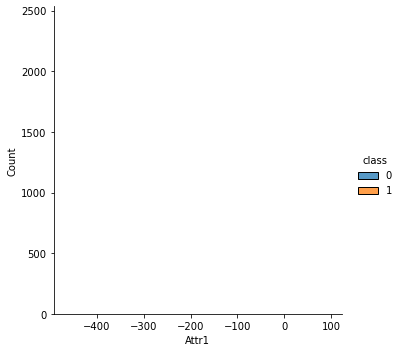

In [30]:
#sns.displot(df, x="Attr1", hue="class", multiple="dodge")